In [62]:
# !pip install cudaq
# !pip install qutip

In [63]:
import numpy as np
import cudaq
import qutip
from typing import List
from matplotlib import pyplot as plt
from typing import LiteralString

# Quantum States in Hilbert Space

Consider a single qubit system with Hilbert space:
$$
\mathcal{H} \cong \mathbb{C}^2
$$
with orthonormal basis states:
$$
|0\rangle = \begin{pmatrix}1 \\ 0\end{pmatrix}, \quad |1\rangle = \begin{pmatrix}0 \\ 1\end{pmatrix}
$$

A general quantum state is:
$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle \in \mathcal{H}, \quad \text{where } \alpha, \beta \in \mathbb{C} \text{ and } |\alpha|^2 + |\beta|^2 = 1
$$

Let ket vectors $$|x\rangle = \begin{pmatrix}x_1 \\ x_2\end{pmatrix}$$

then dual vectors (bra vectors) are defined as:
$$
\langle x| = |x\rangle^\dagger = \begin{pmatrix}x_1^* & x_2^*\end{pmatrix}
$$

Inner product on $\mathcal{H}$ is defined as:
$$
\begin{aligned}
\langle a|b \rangle &= a_1 b_1^* + a_2 b_2^* \\
% bar{<a|b>} = <b|a>
\text{implying} \quad \langle b|a \rangle &= \langle a|b \rangle^*
\end{aligned}
$$

---

Let introduce set of bounded linear operators on $\mathcal{H}$:
$$
\mathcal{L}(\mathcal{H}) = \{T: \mathcal{H} \to \mathcal{H} | T \text{ is linear and bounded}\}.
$$

With the Hadamard gate $H \in \mathcal{L}(\mathcal{H})$ defined as:
$$
H = \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}
$$ 

action on basis states:
$$
\begin{aligned}
H|0\rangle &= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = |+\rangle \\
H|1\rangle &= \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = |-\rangle
\end{aligned}
$$

<br>

And another basic gates $X, Y, Z \in \mathcal{L}(\mathcal{H})$ for 1-qubit systems defined as:
$$
X = \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}, \quad
Y = \begin{pmatrix}0 & -i \\ i & 0\end{pmatrix}, \quad
Z = \begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}
$$

Moreover, all these gates are unitary operators, any $U \in \mathcal{L}(\mathcal{H})$ is unitary if:
$$
U^\dagger U = U U^\dagger = I
$$

In [104]:
@cudaq.kernel
def kernel_one():
    qubit = cudaq.qubit()

@cudaq.kernel
def kernel_one_H():
    qubit = cudaq.qubit()
    h(qubit)

@cudaq.kernel
def kernel_one_X():
    qubit = cudaq.qubit()
    x(qubit)

@cudaq.kernel
def kernel_one_Y():
    qubit = cudaq.qubit()
    y(qubit)

@cudaq.kernel
def kernel_one_Z():
    qubit = cudaq.qubit()
    z(qubit)

@cudaq.kernel
def kernel_one_XY():
    qubit = cudaq.qubit()
    x(qubit)
    y(qubit)

@cudaq.kernel
def kernel_one_XZ():
    qubit = cudaq.qubit()
    x(qubit)
    z(qubit)

@cudaq.kernel
def kernel_one_XH():
    qubit = cudaq.qubit()
    x(qubit)
    h(qubit)

@cudaq.kernel
def kernel_one_HX():
    qubit = cudaq.qubit()
    h(qubit)
    x(qubit)

@cudaq.kernel
def kernel_one_HY():
    qubit = cudaq.qubit()
    h(qubit)
    y(qubit)

@cudaq.kernel
def kernel_one_HZ():
    qubit = cudaq.qubit()
    h(qubit)
    z(qubit)

In [106]:
idx_kernel = 5
kernel_list = [kernel_one, kernel_one_H, kernel_one_X, kernel_one_Y, kernel_one_Z,
               kernel_one_XY, kernel_one_XZ, kernel_one_XH, kernel_one_HX, kernel_one_HY, 
               kernel_one_HZ]
selected_kernel = kernel_list[idx_kernel]
print("Selected kernel:", selected_kernel.name)
print(cudaq.draw(selected_kernel))
result = cudaq.sample(selected_kernel, shots_count=1000)
print(result)
state = cudaq.get_state(selected_kernel)
print(state)

Selected kernel: kernel_one_XY
     ╭───╮╭───╮
q0 : ┤ x ├┤ y ├
     ╰───╯╰───╯

{ 0:1000 }

SV: [(0,-1), (0,0)]



We can define rotation operators around the $X, Y, Z$ axes as:
$R_{X}, R_{Y}, R_{Z} \subset \mathcal{L}(\mathcal{H})$:
$$
\begin{aligned}
R_{X}(\theta) &= e^{-i \frac{\theta}{2} X} \\
&= \cos\left(\frac{\theta}{2}\right) I - i \sin\left(\frac{\theta}{2}\right) X \\
&= \begin{pmatrix}\cos\left(\frac{\theta}{2}\right) & -i \sin\left(\frac{\theta}{2}\right) \\ -i \sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)\end{pmatrix} \\
\text{}
\end{aligned}
$$



<br>

$$
\begin{aligned}
R_{Y}(\theta) &= e^{-i \frac{\theta}{2} Y} \\
&= \cos\left(\frac{\theta}{2}\right) I - i \sin\left(\frac{\theta}{2}\right) Y \\
&= \begin{pmatrix}\cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\ \sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)\end{pmatrix} \\
\end{aligned}
$$

<br>

$$
\begin{aligned}
R_{Z}(\theta) &= e^{-i \frac{\theta}{2} Z} \\
&= \cos\left(\frac{\theta}{2}\right) I - i \sin\left(\frac{\theta}{2}\right) Z \\
&= \begin{pmatrix}e^{-i \frac{\theta}{2}} & 0 \\ 0 & e^{i \frac{\theta}{2}}\end{pmatrix} \\
\end{aligned}
$$


One might notice that $X$, $Y$, and $Z$ gates are equivalent to rotations of $\pi$ around the $X$, $Y$, and $Z$ axes up to a global phase:
$$
X = R_{X}(\pi), \quad Y = R_{Y}(\pi), \quad Z = R_{Z}(\pi)
$$

In [66]:
@cudaq.kernel
def kernel_RX(theta: float):
    qubit = cudaq.qubit()
    rx(theta, qubit)

@cudaq.kernel
def kernel_RY(theta: float):
    qubit = cudaq.qubit()
    ry(theta, qubit)

@cudaq.kernel
def kernel_RZ(theta: float):
    qubit = cudaq.qubit()
    h(qubit)
    rz(theta, qubit)    

In [67]:
theta = np.linspace(0, 2 * np.pi, 12, endpoint=False)
s = cudaq.get_state(kernel_RX, np.pi/2)
states_RX = [cudaq.get_state(kernel_RX, float(t)) for t in theta]
states_RY = [cudaq.get_state(kernel_RY, float(t)) for t in theta]
states_RZ = [cudaq.get_state(kernel_RZ, float(t)) for t in theta]

sphere_X = [cudaq.add_to_bloch_sphere(state) for state in states_RX]
sphere_Y = [cudaq.add_to_bloch_sphere(state) for state in states_RY]
sphere_Z = [cudaq.add_to_bloch_sphere(state) for state in states_RZ]

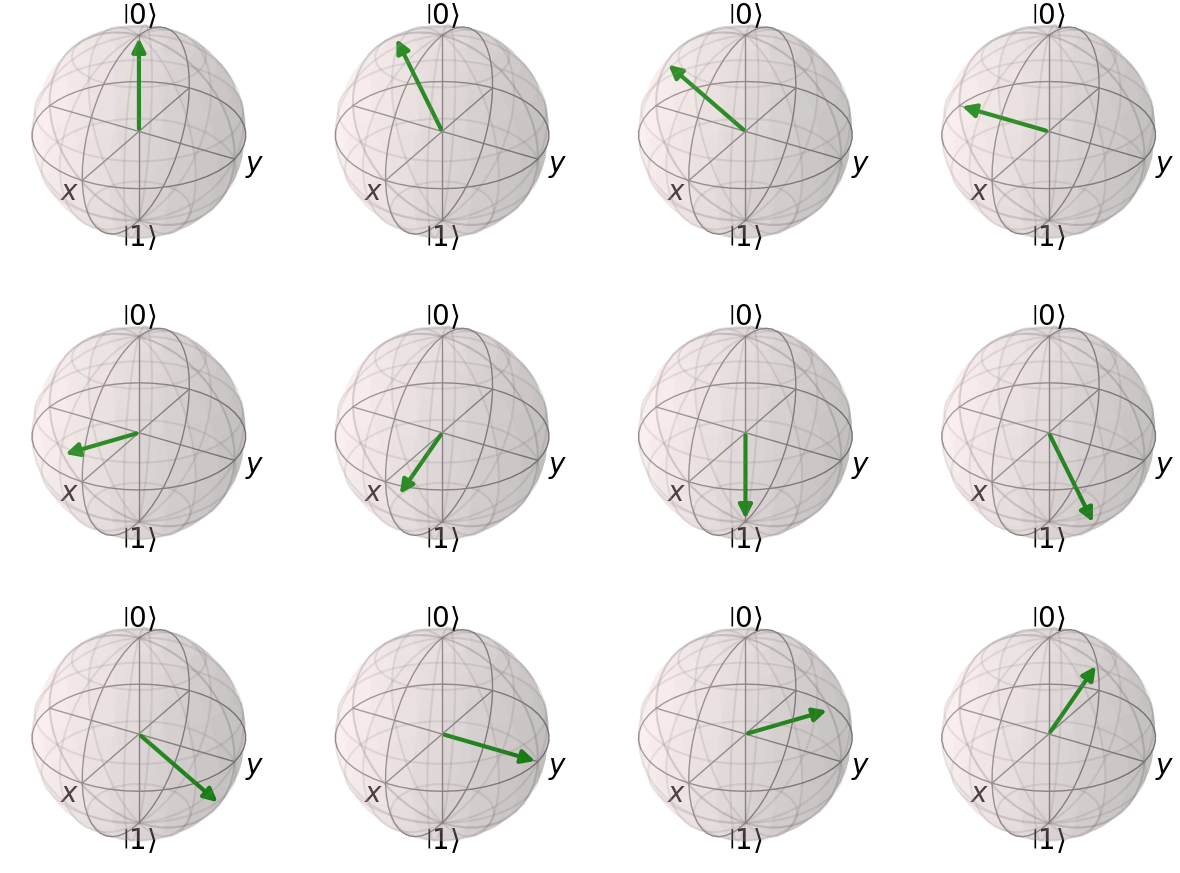

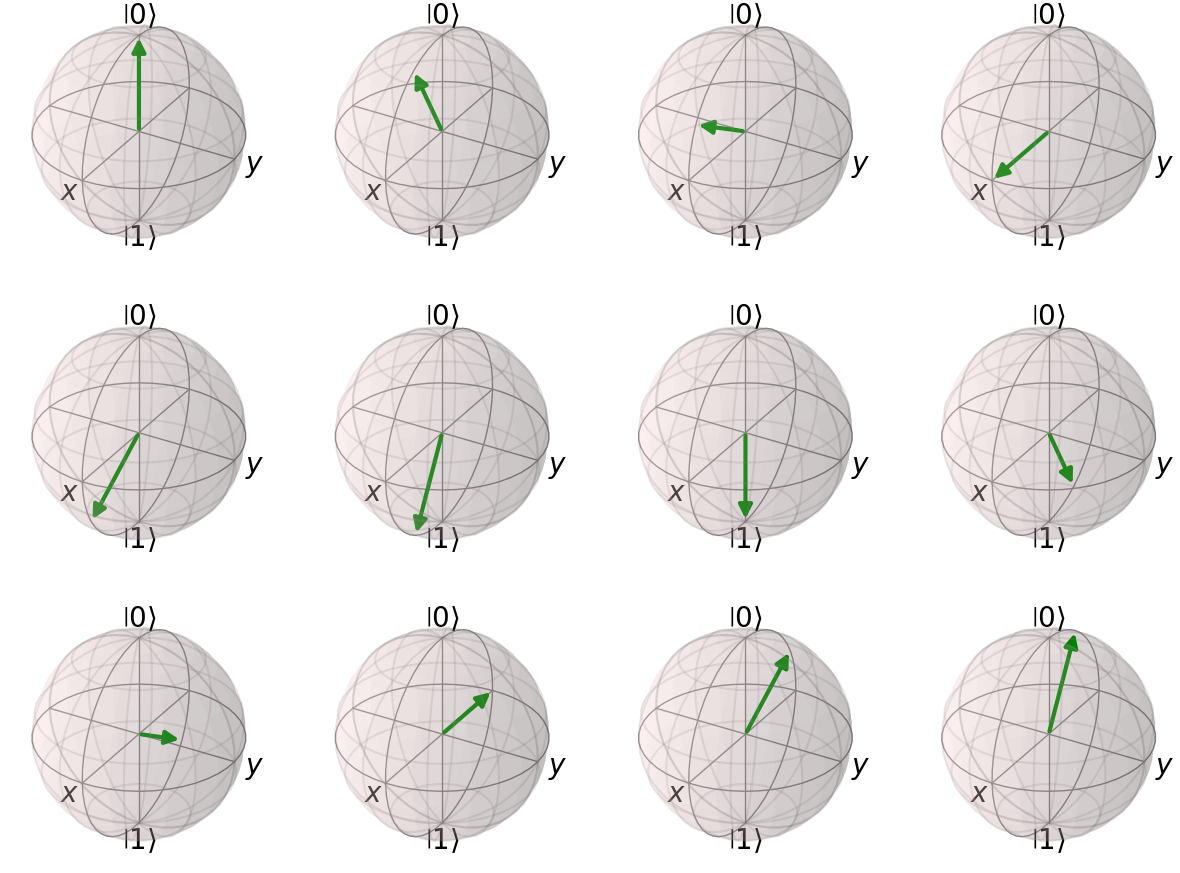

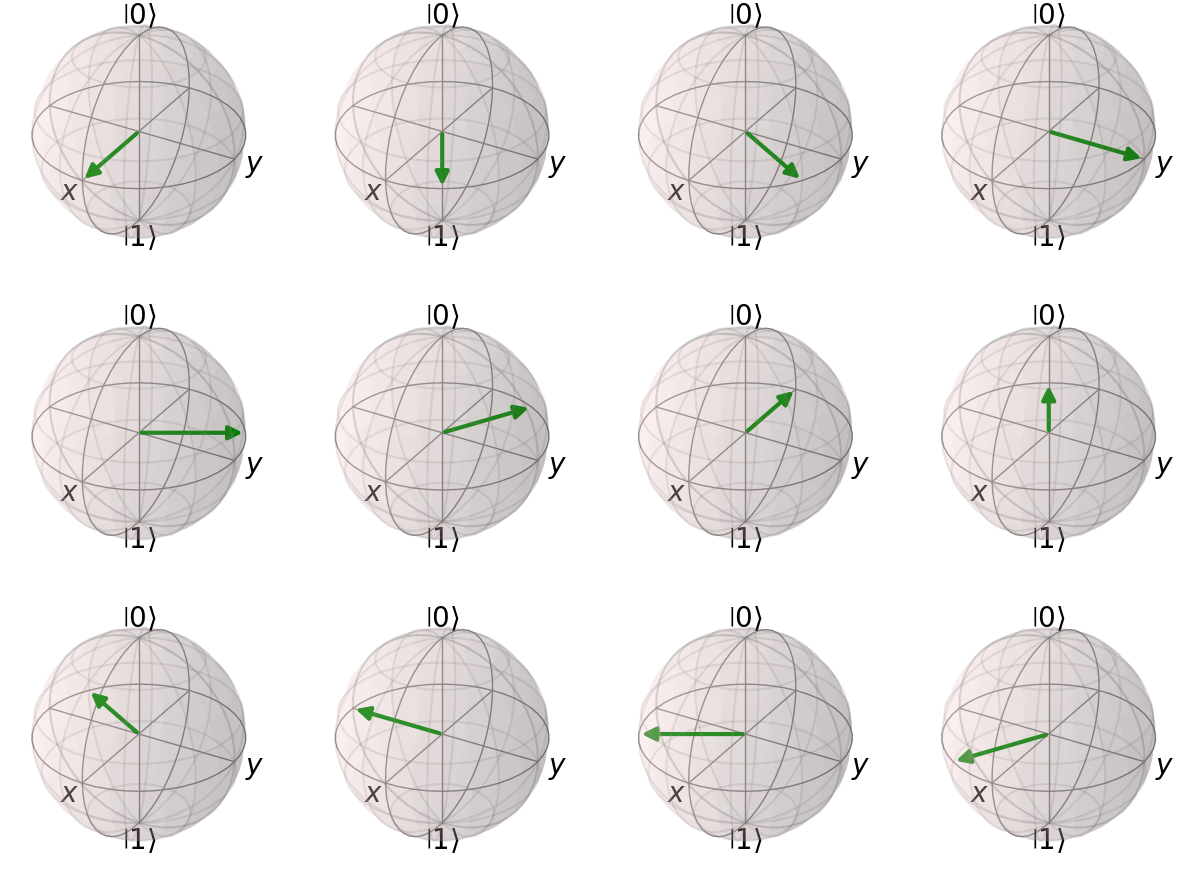

In [ ]:
plt.rcParams.update({'figure.figsize': [15, 15]})
# cudaq.show(sphere_X, ncols=4, nrows=4)
# cudaq.show(sphere_Y, ncols=4, nrows=4)
# cudaq.show(sphere_Z, ncols=4, nrows=4)

In [69]:
@cudaq.kernel
def kernel_rot(theta_x: float, theta_y: float, theta_z: float):
    qubit = cudaq.qubit()
    rx(theta_x, qubit)
    ry(theta_y, qubit)
    rz(theta_z, qubit)

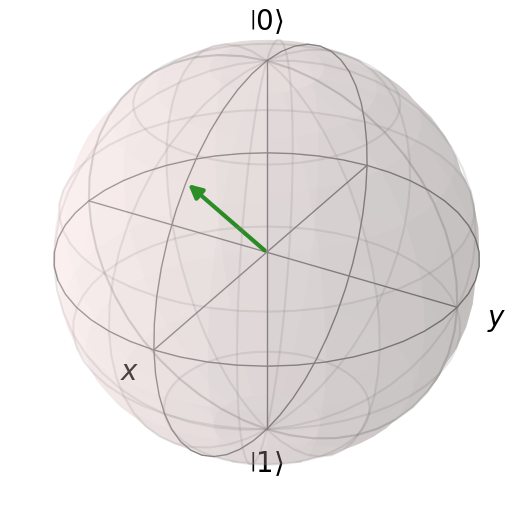

In [70]:
# Feel free to adjust the angles here
theta_x = (np.pi/180) * 45
theta_y = (np.pi/180) * 0
theta_z = (np.pi/180) * 90

rotated_state = cudaq.get_state(kernel_rot, theta_x, theta_y, theta_z)
blochSphere = qutip.Bloch()
cudaq.add_to_bloch_sphere(rotated_state, blochSphere)
blochSphere.show()

# Multi-Qubit State Representation

Let $\Sigma = \{0,1\}$, and $N = 2^n$.

For now, let define tensor product operation $\otimes$ as following:

For any vectors $|a\rangle = \begin{pmatrix}a_1 \\ a_2\end{pmatrix}$ and $|b\rangle = \begin{pmatrix}b_1 \\ b_2\end{pmatrix}$, their tensor product is:
$$
|a\rangle \otimes |b\rangle 
= \begin{pmatrix}a_1 |b\rangle \\ a_2 |b\rangle\end{pmatrix}
= \begin{pmatrix}a_1 \begin{pmatrix}b_1 \\ b_2\end{pmatrix} \\ a_2 \begin{pmatrix}b_1 \\ b_2\end{pmatrix}\end{pmatrix}
$$  

We can write basis states $|x\rangle$ of $n$-qubit system $\mathcal{H}^{\otimes n}$ as:
$$
\begin{aligned}
|x\rangle &= |x_1\rangle \otimes |x_2\rangle \otimes \cdots \otimes |x_n\rangle \\
&= |x_1\rangle |x_2\rangle \cdots |x_n\rangle \\
&= |x_1 x_2 \cdots x_n\rangle, \quad \text{where } x_i \in \Sigma
\end{aligned}
$$
e.g. for 3 qubits system:
$$
\begin{aligned}
|5\rangle
&= |101\rangle \\
&= |1\rangle \otimes |0\rangle \otimes |1\rangle \\
&= \begin{pmatrix}0 \\ 1\end{pmatrix} \otimes \begin{pmatrix}1 \\ 0\end{pmatrix} \otimes \begin{pmatrix}0 \\ 1\end{pmatrix} = \begin{pmatrix}0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0\end{pmatrix}
\end{aligned}
$$

<br>

We can also define tensor product for operators.

For any operators $A$ and $B$, their tensor product is defined as:
<!-- a_11 B ... a_1n B -->
$$
A \otimes B = \begin{pmatrix}
a_{11} B & \cdots & a_{1n} B \\
\vdots & \ddots & \vdots \\
a_{m1} B & \cdots & a_{mn} B
\end{pmatrix}
$$

---

For a system of $n$ qubits, the Hilbert space is the $n$-fold tensor product of single qubit Hilbert spaces:
$$
\mathcal{H}^{\otimes n} = \underbrace{\mathcal{H} \otimes \mathcal{H} \otimes \cdots \otimes \mathcal{H}}_{n \text{ times}} \cong \mathbb{C}^{N}
$$

A general $n$-qubit state $|\psi\rangle$ is:
$$
|\psi\rangle = \sum_{x \in \{0,1\}^n} \alpha_x |x\rangle \in \mathcal{H}^{\otimes n}, \quad \text{where } \sum_x |\alpha_x|^2 = 1
$$

Let $|u\rangle \in \mathcal{H}^{\otimes n}$ be the uniform superposition state:
$$
|u\rangle = \frac{1}{\sqrt{N}} \sum_{x \in \Sigma^n} |x\rangle
$$



$|u\rangle$ can be prepared from $|0\rangle^{\otimes n}$ by applying $H$ to each qubit:
$$
\begin{aligned}
    |u\rangle &= H^{\otimes n} |0\rangle^{\otimes n} \\
    &= (H|0\rangle)^{\otimes n}
\end{aligned}
$$

---

# Quantum Gates for Multi-Qubit Systems

For n-qubit systems, we can define the corresponding gates $U_i \in \mathcal{L}(\mathcal{H}^{\otimes n})$ as:
$$
U_{i} = I^{\otimes (i-1)} \otimes U \otimes I^{\otimes (n-i)}
$$
e.g. $X_2 \in \mathcal{L}(\mathcal{H}^{\otimes 5})$ is:
$$
X_2 = I \otimes X \otimes I \otimes I \otimes I
$$
So that:
$$
\begin{aligned}
X_2 |00000\rangle &= I|0\rangle \otimes X|0\rangle \otimes I|0\rangle \otimes I|0\rangle \otimes I|0\rangle \\
&= |0\rangle \otimes |1\rangle \otimes |0\rangle \otimes |0\rangle \otimes |0\rangle \\
&= |01000\rangle
\end{aligned}
$$

---

For controlled gates $C_iU_j \in \mathcal{L}(\mathcal{H}^{\otimes n})$ where $U \in \mathcal{L}(\mathcal{H}^{\otimes m})$ (e.g. $C_1X_3$, $C_5Z_2$) with the $i$-th qubit as control and the $j$-th qubit as target:

<!-- $$
a+b+\rlap{$\overbrace{\phantom{c+d+e+f+g}}^x$}c+d
     +\underbrace{e+f+g+h+i}_y +k+l=e^2
$$ -->


$$
C_iU_j(|x_1\rangle \otimes \cdots \otimes |x_i\rangle \otimes \cdots \otimes |x_j\rangle \otimes \cdots \otimes |x_n\rangle) = \begin{cases}
|x_1\rangle \otimes \cdots \otimes |x_i\rangle \otimes \cdots \otimes |x_j\rangle \otimes \cdots \otimes |x_n\rangle, & \text{if } x_i = 0 \\
|x_1\rangle \otimes \cdots \otimes |x_i\rangle \otimes \cdots \otimes U|x_j\rangle \otimes \cdots \otimes |x_n\rangle, & \text{if } x_i = 1
\end{cases}
$$

Which can described as applying $U$ to the target qubit only when the control qubit is in state $|1\rangle$

<!-- $$
C_i\textcolor{green}{U}(|0\rangle \otimes |x\rangle) = |0\rangle \otimes |x\rangle
$$
$$
C\textcolor{green}{U}(|1\rangle \otimes |x\rangle) = |1\rangle \otimes \textcolor{green}{U}|x\rangle
$$ -->

e.g. for $C_1X_2$ which is called CNOT gate and denoted as $CX$:
$$CX|00\rangle = |00\rangle, \quad CX|01\rangle = |01\rangle, \quad CX|10\rangle = |11\rangle, \quad CX|11\rangle = |10\rangle$$
and can be represented as:
$$CX = \begin{pmatrix}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{pmatrix}$$

<br>

for $C_1Z_2$ which is the controlled-Z gate and denoted as $CZ$:
$$CZ|00\rangle = |00\rangle, \quad CZ|01\rangle = |01\rangle, \quad CZ|10\rangle = |10\rangle, \quad CZ|11\rangle = -|11\rangle$$
and can be represented as:
$$CZ = \begin{pmatrix}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1\end{pmatrix}$$

---

One example of using these gates is to prepare the Bell state (maximally entangled 2-qubit state):
$$
\begin{aligned}
|\Phi^+\rangle &= \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \\
|\Phi^-\rangle &= \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle) \\
|\Psi^+\rangle &= \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle) \\
|\Psi^-\rangle &= \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)
\end{aligned}
$$


In [71]:
@cudaq.kernel
def kernel_bell(state_type: int):
    q0, q1 = cudaq.qubit(), cudaq.qubit()
    if state_type == 0: # phi +
        h(q0)
        cx(q0, q1)
    elif state_type == 1: # phi -
        x(q0)
        h(q0)
        cx(q0, q1)
    elif state_type == 2: # psi +
        h(q0)
        cx(q0, q1)
        x(q1)
    elif state_type == 3: # psi -
        x(q0)
        h(q0)
        cx(q0, q1)
        x(q1)

@cudaq.kernel
def kernel_little_to_big_endian(state: cudaq.State, n_qb: int):
    q = cudaq.qvector(state)
    for i in range(n_qb//2):
        swap(q[i], q[n_qb - 1 - i])

In [83]:
state_names = ["phi_plus", "phi_minus", "psi_plus", "psi_minus"]
state_type = 3
print(cudaq.draw(kernel_bell, state_type))
result = cudaq.sample(kernel_bell, state_type, shots_count=1000)
print(result)
state = cudaq.get_state(kernel_bell, state_type)
state_big = cudaq.get_state(kernel_little_to_big_endian, state, 2)
print(state_big)

     ╭───╮╭───╮          
q0 : ┤ x ├┤ h ├──●───────
     ╰───╯╰───╯╭─┴─╮╭───╮
q1 : ──────────┤ x ├┤ x ├
               ╰───╯╰───╯

{ 01:497 10:503 }

SV: [(0,0), (0.707107,0), (-0.707107,0), (0,0)]



# Grover's Algorithm
# Problem Statement

Given a Unitary $U_f$ such that:
$$
U_f |x\rangle|a\rangle = |x\rangle|a \oplus f(x)\rangle
$$

<!-- Let $f: \{0,1\}^n \to \{0,1\}$ be a function defined as -->
where $f: \Sigma^n \to \Sigma$ such that:

$$
f(x) = \begin{cases}
1 & \text{if } x \text{ is a solution} \\
0 & \text{otherwise}
\end{cases}
,\quad x \in \Sigma^n,\quad a \in \Sigma
$$

We want to find an $x$ such that $f(x) = 1$.

Let define the sets $A_0$ and $A_1$:
$$
\begin{aligned}
A_0 &= \{x | x \in \Sigma^n and f(x) = 0\} \\
A_1 &= \{x | x \in \Sigma^n and f(x) = 1\}
\end{aligned}
$$

With these sets, we can define the orthonormal basis states:
$$
\begin{aligned}
|A_0 \rangle &= \frac{1}{\sqrt{|A_0|}} \sum_{x \in A_0} |x\rangle \\
|A_1 \rangle &= \frac{1}{\sqrt{|A_1|}} \sum_{x \in A_1} |x\rangle \\
\end{aligned}
$$

Since $A_0 \cap A_1 = \emptyset$, we can easily verify that $\langle A_0 | A_1 \rangle = 0$.

Consider the uniform superposition as a vector in the 2D subspace spanned by $|A_0\rangle$ and $|A_1\rangle$:
$$
|u\rangle = \sqrt{\frac{|A_0|}{N}} |A_0\rangle + \sqrt{\frac{|A_1|}{N}} |A_1\rangle
$$

# Oracle Part

From a given $U_f$ such that:
$$
U_f |x\rangle |a\rangle = |x\rangle |a \oplus f(x)\rangle
$$

<br>

We want to construct an oracle $Z_f$ that act on $|A_0\rangle$ and $|A_1\rangle$ as:
$$
\begin{aligned}
Z_f |A_0\rangle |a\rangle &=  |A_0\rangle |a\rangle \\
Z_f |A_1\rangle |a\rangle &= - |A_1\rangle |a\rangle
\end{aligned}
$$
Which can see as reflecting $|\psi\rangle$ about the $|A_0\rangle$ as shown in the figure below:

### Oracle $U_f$

We can implement the oracle $U_f$ that parallely mark given sets of states to an ancilla qubit by using multi-controlled NOT gates (also known as Toffoli gates).

In [75]:
@cudaq.kernel
def kernel_oracle(v: cudaq.qvector, r: cudaq.qubit, l: List[int]):
    qb = len(v)
    for k in l:
        for i in range(qb):
            if int(k / (2 ** i)) % 2 == 0:
                x(v[qb - i - 1])
        x.ctrl([v], r)
        for i in range(qb):
            if int(k / (2 ** i)) % 2 == 0:
                x(v[qb - i - 1])

@cudaq.kernel
def kernel_example_oracle_mark(qb: int, l: List[int]):
    v = cudaq.qvector(qb)
    r = cudaq.qubit()
    kernel_H(v)
    kernel_oracle(v, r, l)

In [79]:
qb, nums = 4, [3, 6, 13]
results = cudaq.sample(kernel_example_oracle_mark, qb, nums, shots_count=1000)
print(results)
state = cudaq.get_state(kernel_example_oracle_mark, qb, nums)
state_big = cudaq.get_state(kernel_little_to_big_endian, state, qb)
print(state_big)
print(cudaq.draw(kernel_example_oracle_mark, qb, nums))

{ 00000:50 00010:54 00100:60 00111:65 01000:62 01010:68 01101:62 01110:52 10000:60 10010:68 10100:67 10110:62 11000:63 11011:68 11100:62 11110:77 }

SV: [(0.25,0), (0.25,0), (0.25,0), (0,0), (0.25,0), (0.25,0), (0,0), (0.25,0), (0.25,0), (0.25,0), (0.25,0), (0.25,0), (0.25,0), (0,0), (0.25,0), (0.25,0), (0,0), (0,0), (0,0), (0.25,0), (0,0), (0,0), (0.25,0), (0,0), (0,0), (0,0), (0,0), (0,0), (0,0), (0.25,0), (0,0), (0,0)]

     ╭───╮╭───╮     ╭───╮╭───╮     ╭───╮          
q0 : ┤ h ├┤ x ├──●──┤ x ├┤ x ├──●──┤ x ├──●───────
     ├───┤├───┤  │  ├───┤╰───╯  │  ╰───╯  │       
q1 : ┤ h ├┤ x ├──●──┤ x ├───────●─────────●───────
     ├───┤╰───╯  │  ╰───╯       │  ╭───╮  │  ╭───╮
q2 : ┤ h ├───────●──────────────●──┤ x ├──●──┤ x ├
     ├───┤       │  ╭───╮       │  ├───┤  │  ╰───╯
q3 : ┤ h ├───────●──┤ x ├───────●──┤ x ├──●───────
     ╰───╯     ╭─┴─╮╰───╯     ╭─┴─╮╰───╯╭─┴─╮     
q4 : ──────────┤ x ├──────────┤ x ├─────┤ x ├─────
               ╰───╯          ╰───╯     ╰───╯     



### $Z_f$ via Phase Kickback

In [77]:
@cudaq.kernel
def kernel_picknum_flip(v: cudaq.qvector, l: List[int]):
    qb = len(v)
    for k in l:
        for i in range(qb):
            if int(k / (2 ** i)) % 2 == 0:
                x(v[qb - i - 1])
        z.ctrl([v[0:qb-1]], v[qb-1])
        for i in range(qb):
            if int(k / (2 ** i)) % 2 == 0:
                x(v[qb - i - 1])


@cudaq.kernel
def kernel_oracle_example(qb: int, l: List[int]):
    v = cudaq.qvector(qb)
    h(v)
    kernel_picknum_flip(v, l)

@cudaq.kernel
def kernel_example_oracle_flip(qb: int, l: List[int]):
    v = cudaq.qvector(qb)
    r = cudaq.qubit()
    h(v)
    x(r)
    h(r)
    kernel_oracle(v, r, l)

In [78]:
qb, nums = 4, [3, 6, 13]
results = cudaq.sample(kernel_example_oracle_flip, qb, nums, shots_count=1000)
print(results)
state = cudaq.get_state(kernel_example_oracle_flip, qb, nums)
state_big = cudaq.get_state(kernel_little_to_big_endian, state, qb)
print(state_big)
print(cudaq.draw(kernel_example_oracle_flip, qb, nums))

{ 00000:28 00001:29 00010:28 00011:39 00100:35 00101:40 00110:27 00111:39 01000:25 01001:30 01010:32 01011:37 01100:20 01101:39 01110:38 01111:31 10000:30 10001:26 10010:28 10011:26 10100:42 10101:24 10110:25 10111:40 11000:27 11001:30 11010:30 11011:32 11100:31 11101:35 11110:26 11111:31 }

SV: [(0.176777,0), (0.176777,0), (0.176777,0), (-0.176777,0), (0.176777,0), (0.176777,0), (-0.176777,0), (0.176777,0), (0.176777,0), (0.176777,0), (0.176777,0), (0.176777,0), (0.176777,0), (-0.176777,0), (0.176777,0), (0.176777,0), (-0.176777,0), (-0.176777,0), (-0.176777,0), (0.176777,0), (-0.176777,0), (-0.176777,0), (0.176777,0), (-0.176777,0), (-0.176777,0), (-0.176777,0), (-0.176777,0), (-0.176777,0), (-0.176777,0), (0.176777,0), (-0.176777,0), (-0.176777,0)]

     ╭───╮╭───╮     ╭───╮╭───╮     ╭───╮          
q0 : ┤ h ├┤ x ├──●──┤ x ├┤ x ├──●──┤ x ├──●───────
     ├───┤├───┤  │  ├───┤╰───╯  │  ╰───╯  │       
q1 : ┤ h ├┤ x ├──●──┤ x ├───────●─────────●───────
     ├───┤╰───╯  │  ╰───╯       │

### Diffusion Part

In [73]:
@cudaq.kernel
def kernel_diffuser(v: cudaq.qvector):
    qb = len(v)
    h(v)
    x(v)
    z.ctrl([v[0:qb-1]], v[qb-1])
    x(v)
    h(v)

@cudaq.kernel
def kernel_diffuser_example(qb: int, num: int):
    v = cudaq.qvector(qb)
    for i in range(qb):
        if int(num / (2 ** i)) % 2 == 1:
            x(v[qb - i - 1])
    h(v)
    kernel_diffuser(v)
    h(v)

In [ ]:
qb, num = 4, 6
print(cudaq.draw(kernel_diffuser_example, qb, num))
results = cudaq.sample(kernel_diffuser_example, qb, num, shots_count=1000)
print(results)
state = cudaq.get_state(kernel_diffuser_example, qb, num)
state_big = cudaq.get_state(kernel_little_to_big_endian, state, qb)
print(state_big)


     ╭───╮╭───╮╭───╮          ╭───╮╭───╮╭───╮
q0 : ┤ h ├┤ h ├┤ x ├───────●──┤ x ├┤ h ├┤ h ├
     ├───┤├───┤├───┤╭───╮  │  ├───┤├───┤├───┤
q1 : ┤ x ├┤ h ├┤ h ├┤ x ├──●──┤ x ├┤ h ├┤ h ├
     ├───┤├───┤├───┤├───┤  │  ├───┤├───┤├───┤
q2 : ┤ x ├┤ h ├┤ h ├┤ x ├──●──┤ x ├┤ h ├┤ h ├
     ├───┤├───┤├───┤╰───╯╭─┴─╮├───┤├───┤├───┤
q3 : ┤ h ├┤ h ├┤ x ├─────┤ z ├┤ x ├┤ h ├┤ h ├
     ╰───╯╰───╯╰───╯     ╰───╯╰───╯╰───╯╰───╯

{ 0110:1000 }

SV: [(0,0), (0,0), (0,0), (0,0), (0,0), (0,0), (1,0), (0,0), (0,0), (0,0), (0,0), (0,0), (0,0), (0,0), (0,0), (0,0)]



<!-- 2|u><u| - I -->
What we implemented is $\mathbb{I} - 2|u\rangle\langle u|$ which is equivalent to the diffusion operator $D = 2|u\rangle\langle u| - \mathbb{I}$ up to a global phase.

### Grover's Algorithm Implementation

In [44]:
@cudaq.kernel
def kernel_grover(qb:int, l: List[int], iterations: int):
    v = cudaq.qvector(qb)
    r = cudaq.qubit()
    x(r)
    h(r)
    h(v)
    for _ in range(iterations):
        # kernel_picknum_flip(v, l)
        kernel_oracle(v, r, l)
        kernel_diffuser(v)
    mz(v)

print(cudaq.draw(kernel_grover, 4, [3,6,13], 2))

     ╭───╮╭───╮     ╭───╮╭───╮     ╭───╮     ╭───╮╭───╮          ╭───╮╭───╮»
q0 : ┤ h ├┤ x ├──●──┤ x ├┤ x ├──●──┤ x ├──●──┤ h ├┤ x ├───────●──┤ x ├┤ h ├»
     ├───┤├───┤  │  ├───┤╰───╯  │  ╰───╯  │  ├───┤├───┤       │  ├───┤├───┤»
q1 : ┤ h ├┤ x ├──●──┤ x ├───────●─────────●──┤ h ├┤ x ├───────●──┤ x ├┤ h ├»
     ├───┤╰───╯  │  ╰───╯       │  ╭───╮  │  ├───┤├───┤╭───╮  │  ├───┤├───┤»
q2 : ┤ h ├───────●──────────────●──┤ x ├──●──┤ x ├┤ h ├┤ x ├──●──┤ x ├┤ h ├»
     ├───┤       │  ╭───╮       │  ├───┤  │  ├───┤├───┤╰───╯╭─┴─╮├───┤├───┤»
q3 : ┤ h ├───────●──┤ x ├───────●──┤ x ├──●──┤ h ├┤ x ├─────┤ z ├┤ x ├┤ h ├»
     ├───┤╭───╮╭─┴─╮╰───╯     ╭─┴─╮╰───╯╭─┴─╮╰───╯╰───╯     ╰───╯╰───╯╰───╯»
q4 : ┤ x ├┤ h ├┤ x ├──────────┤ x ├─────┤ x ├──────────────────────────────»
     ╰───╯╰───╯╰───╯          ╰───╯     ╰───╯                              »

################################################################################

╭───╮     ╭───╮╭───╮     ╭───╮     ╭───╮╭───╮          ╭───╮╭───╮
┤ x 

In [45]:
# qb = 5
# nums = [3, 12, 5]

qb = 7
nums = [68, 103, 119, 45]

zeta = np.arcsin(np.sqrt(len(nums) / 2**qb))
print(f'zeta: {zeta / np.pi * 180:.2f}')

iters = round((np.pi / (4 * zeta)) - 0.5)
print(f'\nOptimal iterations: {iters}')
optimal_zeta = zeta * (2 * iters + 1)
print(f'Optimal zeta: {optimal_zeta / np.pi * 180:.2f}')

probs_true = np.abs(np.sin(optimal_zeta))**2
probs_false = np.abs(np.cos(optimal_zeta))**2
print(f'\nProbability of True: {probs_true:.4f}')
print(f'Probability of False: {probs_false:.4f}')

zeta: 10.18

Optimal iterations: 4
Optimal zeta: 91.64

Probability of True: 0.9992
Probability of False: 0.0008


In [48]:
shots = 10000
results = cudaq.sample(kernel_grover, qb, nums, iters, shots_count=shots)
# print(results)

result_final = np.zeros(2**qb)
probs = np.zeros_like(result_final)
pt = 0
for i in results:
    result_final[int(i, 2)] = results[i]
    probs[int(i, 2)] = results[i] / shots
    if int(i, 2) in nums:
        pt += probs[int(i, 2)]
# print(probs)
print(f'Probability of measuring True: {pt:.5f}')
print(f'Probability of Theoretical True: {probs_true:.5f}')

print(f'\nProbability of measuring False: {1-pt:.5f}')
print(f'Probability of Theoretical False: {probs_false:.5f}')

Probability of measuring True: 0.99910
Probability of Theoretical True: 0.99918

Probability of measuring False: 0.00090
Probability of Theoretical False: 0.00082


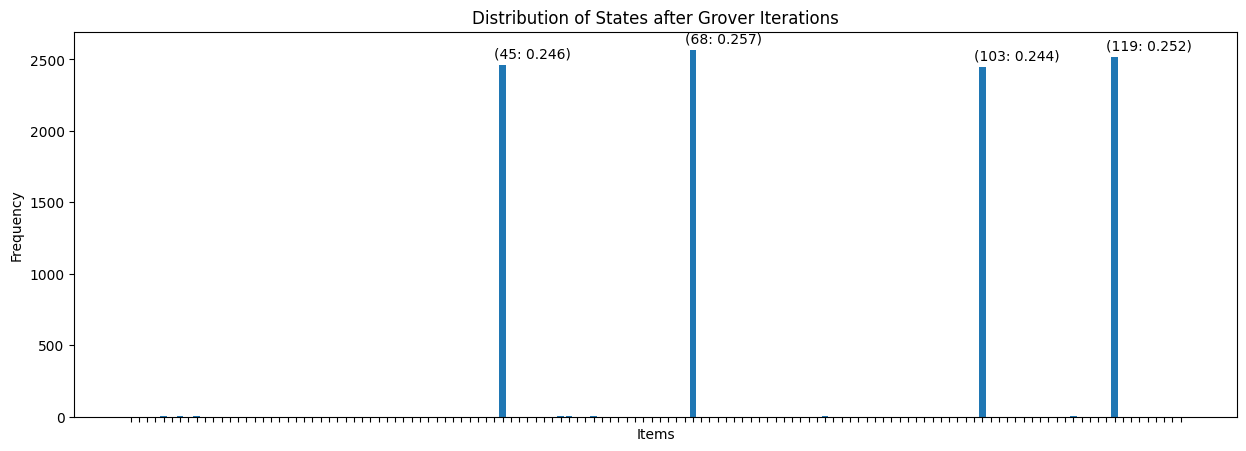

In [181]:
plt.figure(figsize=(15, 5))
x = np.arange(2**qb)
plt.bar(range(2**qb), result_final)

plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Distribution of States after Grover Iterations')

# plt.xticks(x, [f"{i:0{qb}b}" for i in x])
# plt.xticks(x, [f"{i}" for i in x])
plt.xticks(x, [f"" for i in x])
plt.gca().set_xticklabels([])
plt.xticks(visible=False)


xlocs, xlabs = plt.xticks()
for i, s in enumerate(probs):
    if s > 0.1:
        plt.text(xlocs[i]-1, result_final[i] + shots/200, f"({i}: {s:.3f})")
plt.show()